In [1]:
import pandas as pd

training_set = pd.read_excel("Data_Train.xlsx")
#test_set = pd.read_excel("Test_set.xlsx")


In [2]:
training_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
training_set.dropna(inplace=True)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [4]:
training_set['Date_of_Journey']=pd.to_datetime(training_set['Date_of_Journey'])

In [5]:
training_set.sort_values(by='Date_of_Journey',inplace=True)

In [6]:
training_set=training_set.set_index('Date_of_Journey')

In [7]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_of_Journey,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067


In [8]:
new_total_stops=[]
for i in range(0,10682):
    if training_set['Total_Stops'][i] == '1 stop':
        new_total_stops.append(int(1))
    elif training_set['Total_Stops'][i] == '2 stops':
        new_total_stops.append(int(2))
    elif training_set['Total_Stops'][i]== 'non-stop':
        new_total_stops.append(int(0))
    elif training_set['Total_Stops'][i]=='3 stops':
        new_total_stops.append(int(3))
    elif training_set['Total_Stops'][i]== '4 stops':
        new_total_stops.append(int(4))

In [9]:
New_Total_Stops=pd.DataFrame(new_total_stops,columns=['New_Total_Stops'])
New_Total_Stops.set_index(training_set.index,inplace=True)
New_Total_Stops.head()

,New_Total_Stops
Date_of_Journey,
2019-01-03,0
2019-01-03,1
2019-01-03,1
2019-01-03,2
2019-01-03,0


In [10]:
training_set=pd.concat([training_set,New_Total_Stops],axis=1, join_axes=[training_set.index])

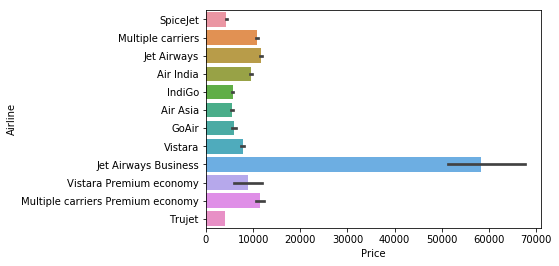

In [12]:
import seaborn as sns
sns.barplot(x='Price',y='Airline',data=training_set)

In [13]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,New_Total_Stops
Date_of_Journey,,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,0
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372,2
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,0


In [14]:
final_list=[]
for st in training_set['Duration']:
    flag=0
    result=0
    s=0
    s1=0
    li=[]
    for i in st:
        if(i =='1' or i=='2' or i =='3' or i =='4' or i =='5' or i =='6' or i =='7' or i =='8' or i =='9' or i =='0'):
            res=int(i)
            s=(s*10)+res
        
        elif(i=='h'):
            flag=1
            s=s*60
            li.append(s)
            
        if((i =='1' or i=='2' or i =='3' or i =='4' or i =='5' or i =='6' or i =='7' or i =='8' or i =='9' or i =='0') and flag==1):
            res1=int(i)
            
            s1=(s1*10)+res1
        elif(i=='m'):
            li.append(s1)
            
    final_list.append((sum(li)))

In [15]:
duration=[]
for j in range(0,10682):
    duration.append(int(final_list[j]))

In [16]:
Duration_changed=pd.DataFrame(duration,columns=['Duration_in_min'])
Duration_changed.set_index(training_set.index,inplace=True)
Duration_changed.head()

,Duration_in_min
Date_of_Journey,
2019-01-03,150
2019-01-03,780
2019-01-03,380
2019-01-03,1580
2019-01-03,175


In [17]:
training_set=pd.concat([training_set,Duration_changed],axis=1, join_axes=[training_set.index])

In [18]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,New_Total_Stops,Duration_in_min
Date_of_Journey,,,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,0,150
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1,780
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1,380
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372,2,1580
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,0,175


In [19]:
training_set.drop(['Duration','Total_Stops'],axis=1,inplace=True)

In [20]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,New_Total_Stops,Duration_in_min
Date_of_Journey,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,No info,5515,0,150
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,No info,29528,1,780
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,No info,26890,1,380
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,No info,19372,2,1580
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,No info,10067,0,175


In [21]:

new_duration=[]
for time in range(0,10682):
    if training_set.Duration_in_min[time] >=0 and training_set.Duration_in_min[time] <=300:
        new_duration.append(1)
        
    elif training_set.Duration_in_min[time] >=301 and training_set.Duration_in_min[time] <=600:
         new_duration.append(2)
        
    elif training_set.Duration_in_min[time] >=601 and training_set.Duration_in_min[time] <=900:
         new_duration.append(3)
        
    elif training_set.Duration_in_min[time] >=901 and training_set.Duration_in_min[time] <=1200:
         new_duration.append(4)
        
    elif training_set.Duration_in_min[time] >=1201 and training_set.Duration_in_min[time] <=1500:
         new_duration.append(5)
        
    elif training_set.Duration_in_min[time] >=1501 and training_set.Duration_in_min[time] <=1800:
         new_duration.append(6)
         
    elif training_set.Duration_in_min[time] >=1801 and training_set.Duration_in_min[time] <=2100:
         new_duration.append(7)
         
    elif training_set.Duration_in_min[time] >=2101 and training_set.Duration_in_min[time] <=2400:
         new_duration.append(8)
         
    elif training_set.Duration_in_min[time] >=2401 and training_set.Duration_in_min[time] <=2700:
         new_duration.append(9)
        
    elif training_set.Duration_in_min[time] >=2701 and training_set.Duration_in_min[time] <=3000:
         new_duration.append(10)
         
    
        

In [22]:
len(new_duration)

10682

In [23]:
New_Duration=pd.DataFrame(new_duration,columns=['New_Duration'])
New_Duration.set_index(training_set.index,inplace=True)
New_Duration.tail()

,New_Duration
Date_of_Journey,
2019-12-06,3
2019-12-06,2
2019-12-06,5
2019-12-06,5
2019-12-06,3


In [24]:
training_set=pd.concat([training_set,New_Duration],axis=1, join_axes=[training_set.index])

In [26]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,New_Total_Stops,Duration_in_min,New_Duration
Date_of_Journey,,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,No info,5515,0,150,1
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,No info,29528,1,780,3
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,No info,26890,1,380,2
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,No info,19372,2,1580,6
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,No info,10067,0,175,1


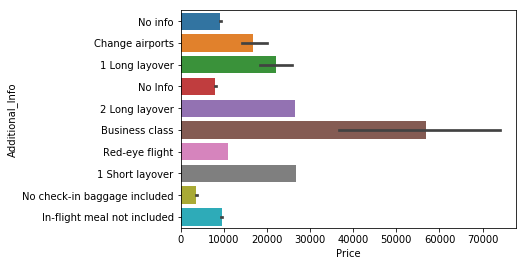

In [27]:
sns.barplot(y='Additional_Info',x='Price',data=training_set)

In [28]:
print(training_set[training_set['Additional_Info']=='No info'].Price.mean())
print(training_set[training_set['Additional_Info']=='No Info'].Price.mean())
print(training_set[training_set['Additional_Info']=='Red-eye flight'].Price.mean())
print(training_set[training_set['Additional_Info']=='No check-in baggage included'].Price.mean())

9141.519295302014
8044.666666666667
10873.0
3645.15625


In [30]:
print(training_set[training_set['Additional_Info']=='1 Long layover'].Price.mean())
print(training_set[training_set['Additional_Info']=='2 Long layover'].Price.mean())
print(training_set[training_set['Additional_Info']=='Change airports'].Price.mean())

22109.63157894737
26480.0
16800.714285714286


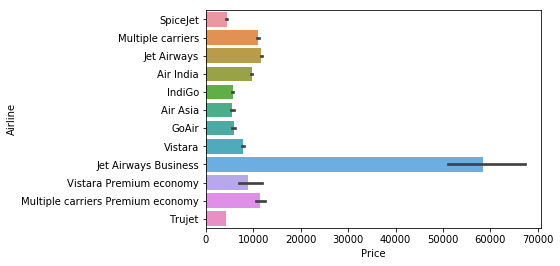

In [31]:
sns.barplot(x='Price',y='Airline',data=training_set)

In [32]:
print(training_set[training_set.Airline=='Vistara'].Price.mean())
print(training_set[training_set.Airline=='IndiGo'].Price.mean())
print(training_set[training_set.Airline=='SpiceJet'].Price.mean())
print(training_set[training_set.Airline=='Air Asia'].Price.mean())
print(training_set[training_set.Airline=='GoAir'].Price.mean())
print(training_set[training_set.Airline=='Trujet'].Price.mean())

7796.348643006263
5673.68290306868
4338.284841075794
5590.260188087775
5861.056701030928
4140.0


In [33]:
print(training_set[training_set.Airline=='Vistara Premium economy'].Price.mean())
print(training_set[training_set.Airline=='Jet Airways'].Price.mean())
print(training_set[training_set.Airline=='Multiple carriers'].Price.mean())
print(training_set[training_set.Airline=='Air India'].Price.mean())
print(training_set[training_set.Airline=='Multiple carriers Premium economy'].Price.mean())
print(training_set[training_set.Airline=='Jet Airways Business'].Price.mean())

8962.333333333334
11643.92335671603
10902.678093645485
9612.427755568247
11418.846153846154
58358.666666666664


In [34]:
dummy_set=training_set.copy()

In [35]:
training_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,New_Total_Stops,Duration_in_min,New_Duration
Date_of_Journey,,,,,,,,,,,
2019-01-03,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,No info,5515,0,150,1
2019-01-03,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,No info,29528,1,780,3
2019-01-03,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,No info,26890,1,380,2
2019-01-03,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,No info,19372,2,1580,6
2019-01-03,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,No info,10067,0,175,1


In [36]:
dummy_set.Airline.unique()

array(['SpiceJet', 'Multiple carriers', 'Jet Airways', 'Air India',
       'IndiGo', 'Air Asia', 'GoAir', 'Vistara', 'Jet Airways Business',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [37]:
airline=[]
for i in range(0,10682):
    if dummy_set.Airline[i]=='Vistara' or dummy_set.Airline[i]=='IndiGo' or dummy_set.Airline[i]=='SpiceJet' or dummy_set.Airline[i]=='Air Asia' or dummy_set.Airline[i]=='GoAir' or dummy_set.Airline[i]=='Trujet':
        airline.append(1)
    elif dummy_set.Airline[i]=='Vistara Premium economy' or dummy_set.Airline[i]=='Jet Airways' or dummy_set.Airline[i]=='Multiple carriers' or dummy_set.Airline[i]=='Air India' or dummy_set.Airline[i]=='Multiple carriers Premium economy':
        airline.append(2)
    elif dummy_set.Airline[i]=='Jet Airways Business':
        airline.append(3)
        

In [38]:
print(len(airline))

10682


In [39]:
New_airline=pd.DataFrame(airline,columns=['New_airline'])
New_airline.set_index(dummy_set.index,inplace=True)
New_airline.info()
dummy_set=pd.concat([dummy_set,New_airline],axis=1, join_axes=[dummy_set.index])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10682 entries, 2019-01-03 to 2019-12-06
Data columns (total 1 columns):
New_airline    10682 non-null int64
dtypes: int64(1)
memory usage: 166.9 KB


In [40]:
dummy_set.drop(['Airline'],axis=1,inplace=True)

In [41]:
dummy_set.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [42]:
dummy_set.drop(['Duration_in_min'],axis=1,inplace=True)

In [43]:
dummy_set.head()

,Source,Destination,Route,Additional_Info,Price,New_Total_Stops,New_Duration,New_airline
Date_of_Journey,,,,,,,,
2019-01-03,Kolkata,Banglore,CCU → BLR,No info,5515,0,1,1
2019-01-03,Delhi,Cochin,DEL → BOM → COK,No info,29528,1,3,2
2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,No info,26890,1,2,2
2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,No info,19372,2,6,2
2019-01-03,Banglore,New Delhi,BLR → DEL,No info,10067,0,1,1


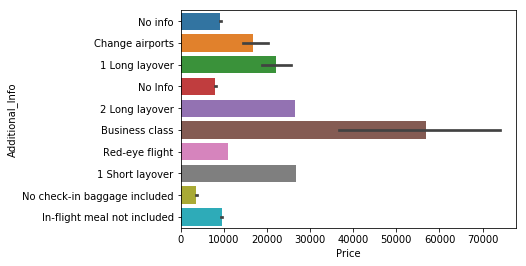

In [44]:
sns.barplot(x='Price',y='Additional_Info',data=dummy_set)

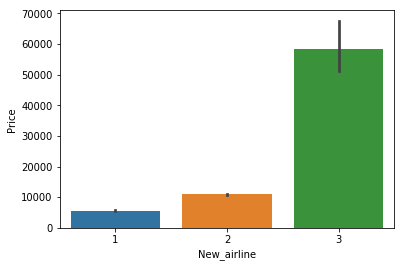

In [45]:
sns.barplot(x='New_airline',y='Price',data=dummy_set)

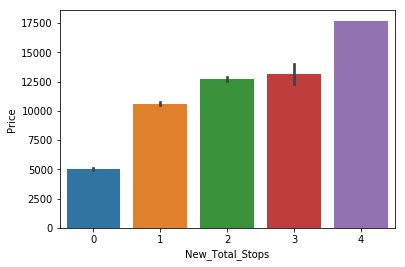

In [46]:
sns.barplot(x='New_Total_Stops',y='Price',data=dummy_set)

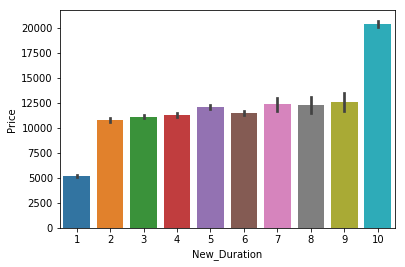

In [47]:
sns.barplot(y='Price',x='New_Duration',data=dummy_set)


In [48]:
duration_compressed=[]
for i in range(0,10682):
    if dummy_set.New_Duration[i]>=2 and dummy_set.New_Duration[i]<=9:
        duration_compressed.append(2)
    elif dummy_set.New_Duration[i]>=1 and dummy_set.New_Duration[i]<2:
        duration_compressed.append(1)
    else:
        duration_compressed.append(3)

In [49]:
len(duration_compressed)
New_Duration_compressed=pd.DataFrame(duration_compressed,columns=['New_Duration_compressed'])
New_Duration_compressed.set_index(training_set.index,inplace=True)
dummy_set=pd.concat([dummy_set,New_Duration_compressed],axis=1, join_axes=[dummy_set.index])

In [50]:
dummy_set.head()

,Source,Destination,Route,Additional_Info,Price,New_Total_Stops,New_Duration,New_airline,New_Duration_compressed
Date_of_Journey,,,,,,,,,
2019-01-03,Kolkata,Banglore,CCU → BLR,No info,5515,0,1,1,1
2019-01-03,Delhi,Cochin,DEL → BOM → COK,No info,29528,1,3,2,2
2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,No info,26890,1,2,2,2
2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,No info,19372,2,6,2,2
2019-01-03,Banglore,New Delhi,BLR → DEL,No info,10067,0,1,1,1


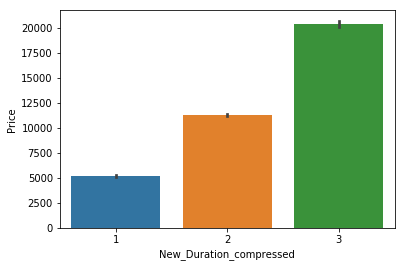

In [51]:
sns.barplot(x='New_Duration_compressed',y='Price',data=dummy_set)

In [52]:
dummy_set['New_airline']=pd.Categorical(dummy_set['New_airline'])
dfDummies = pd.get_dummies(dummy_set['New_airline'], prefix = 'Airline')
dummy_set = pd.concat([dummy_set, dfDummies], axis=1)

In [53]:
dummy_set.head()

,Source,Destination,Route,Additional_Info,Price,New_Total_Stops,New_Duration,New_airline,New_Duration_compressed,Airline_1,Airline_2,Airline_3
Date_of_Journey,,,,,,,,,,,,
2019-01-03,Kolkata,Banglore,CCU → BLR,No info,5515,0,1,1,1,1,0,0
2019-01-03,Delhi,Cochin,DEL → BOM → COK,No info,29528,1,3,2,2,0,1,0
2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,No info,26890,1,2,2,2,0,1,0
2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,No info,19372,2,6,2,2,0,1,0
2019-01-03,Banglore,New Delhi,BLR → DEL,No info,10067,0,1,1,1,1,0,0


In [54]:
dummy_set['New_Duration_compressed']=pd.Categorical(dummy_set['New_Duration_compressed'])
dfDummies = pd.get_dummies(dummy_set['New_Duration_compressed'], prefix = 'Duration')
dummy_set = pd.concat([dummy_set, dfDummies], axis=1)

In [55]:
dummy_set.drop(['New_Duration','New_Duration_compressed','New_airline'],axis=1,inplace=True)

In [56]:
dummy_set['New_Total_Stops']=pd.Categorical(dummy_set['New_Total_Stops'])
dfDummies = pd.get_dummies(dummy_set['New_Total_Stops'], prefix = 'Stops')
dummy_set = pd.concat([dummy_set, dfDummies], axis=1)

In [57]:
dummy_set.head()

,Source,Destination,Route,Additional_Info,Price,New_Total_Stops,Airline_1,Airline_2,Airline_3,Duration_1,Duration_2,Duration_3,Stops_0,Stops_1,Stops_2,Stops_3,Stops_4
Date_of_Journey,,,,,,,,,,,,,,,,,
2019-01-03,Kolkata,Banglore,CCU → BLR,No info,5515,0,1,0,0,1,0,0,1,0,0,0,0
2019-01-03,Delhi,Cochin,DEL → BOM → COK,No info,29528,1,0,1,0,0,1,0,0,1,0,0,0
2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,No info,26890,1,0,1,0,0,1,0,0,1,0,0,0
2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,No info,19372,2,0,1,0,0,1,0,0,0,1,0,0
2019-01-03,Banglore,New Delhi,BLR → DEL,No info,10067,0,1,0,0,1,0,0,1,0,0,0,0


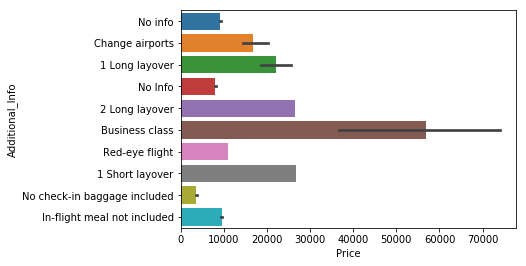

In [58]:
sns.barplot(x='Price',y='Additional_Info',data=dummy_set)

In [59]:
info=[]
for i in range(0,10682):
    if dummy_set.Additional_Info[i]=='No info' or dummy_set.Additional_Info[i]=='No Info' or dummy_set.Additional_Info[i]=='Red-eye flight' or dummy_set.Additional_Info[i]=='In-flight meal not included':
        info.append(1)
    elif dummy_set.Additional_Info[i]=='Change airports' or dummy_set.Additional_Info[i]=='1 Long layover' or dummy_set.Additional_Info[i]=='2 Long layover' or dummy_set.Additional_Info[i]=='1 Short layover':
        info.append(2)
    elif dummy_set.Additional_Info[i]=='Business class':
        info.append(3)
    elif dummy_set.Additional_Info[i]=='No check-in baggage included':
        info.append(4)
        

In [60]:
len(info)

10682

In [61]:
New_info=pd.DataFrame(info,columns=['New_info'])
New_info.set_index(dummy_set.index,inplace=True)
New_info.info()
dummy_set=pd.concat([dummy_set,New_info],axis=1, join_axes=[dummy_set.index])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10682 entries, 2019-01-03 to 2019-12-06
Data columns (total 1 columns):
New_info    10682 non-null int64
dtypes: int64(1)
memory usage: 166.9 KB


In [62]:
dummy_set['New_info']=pd.Categorical(dummy_set['New_info'])
dfDummies = pd.get_dummies(dummy_set['New_info'], prefix = 'Info')
dummy_set = pd.concat([dummy_set, dfDummies], axis=1)

In [63]:
dummy_set.drop(['Additional_Info','New_Total_Stops'],axis=1,inplace=True)

In [64]:
dummy_set.head()

,Source,Destination,Route,Price,Airline_1,Airline_2,Airline_3,Duration_1,Duration_2,Duration_3,Stops_0,Stops_1,Stops_2,Stops_3,Stops_4,New_info,Info_1,Info_2,Info_3,Info_4
Date_of_Journey,,,,,,,,,,,,,,,,,,,,
2019-01-03,Kolkata,Banglore,CCU → BLR,5515,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
2019-01-03,Delhi,Cochin,DEL → BOM → COK,29528,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,26890,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,19372,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
2019-01-03,Banglore,New Delhi,BLR → DEL,10067,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0


In [65]:
dummy_set.drop(['Route'],axis=1,inplace=True)

In [66]:
dummy_set.drop(['New_info'],axis=1,inplace=True)

In [67]:
training_set[(training_set.Source=='Delhi')&(training_set.Airline=='Jet Airways')].Price.mean()

12642.593316519546

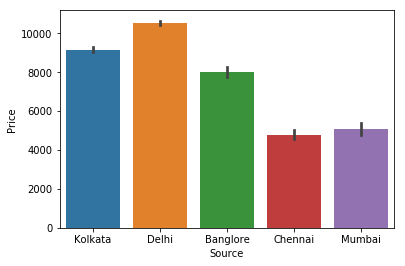

In [68]:
sns.barplot(x='Source',y='Price',data=dummy_set)

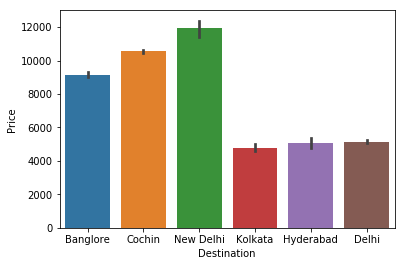

In [69]:
sns.barplot(x='Destination',y='Price',data=dummy_set)

In [70]:
dummy_set1=dummy_set.copy()

In [71]:
dummy_set1.drop(['Source','Destination'],axis=1,inplace=True)

In [72]:
dummy_set1.head()

,Price,Airline_1,Airline_2,Airline_3,Duration_1,Duration_2,Duration_3,Stops_0,Stops_1,Stops_2,Stops_3,Stops_4,Info_1,Info_2,Info_3,Info_4
Date_of_Journey,,,,,,,,,,,,,,,,
2019-01-03,5515,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2019-01-03,29528,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
2019-01-03,26890,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
2019-01-03,19372,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2019-01-03,10067,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [73]:

Y = dummy_set1.iloc[:,0].values  

# Independent Variables
X = dummy_set1.iloc[:,dummy_set1.columns != 'Price'].values 



In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [75]:
print(X_train.shape)
print(Y_train.shape)


(8545, 15)
(8545,)


### Support Vector Regressor

In [83]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(X_train,Y_train)

Y_pred = (svr.predict(X_test))

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [84]:
import numpy as np
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
accuracy=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(accuracy*100)
print(rmse)

13.938981754374346
4163.764253358352


## Modelling with Decision Tree Regressor

In [76]:


from sklearn.tree import DecisionTreeRegressor


tree=DecisionTreeRegressor()

tree.fit(X_train,Y_train)

Y_pred = (tree.predict(X_test))

print(Y_pred)
pd.DataFrame(Y_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)


[ 4788.58411765  4788.58411765  6129.14975845 ... 12703.63506711
 11578.15916542 11578.15916542]


In [78]:
import numpy as np
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
accuracy=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(accuracy*100)
print(rmse)

60.275907286238194
2828.8497793371776


### RandomForest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(X_train,Y_train)
Y_pred=random.predict(X_test)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
import numpy as np
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
accuracy=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(accuracy*100)
print(rmse)

60.411760392856536
2824.008420568921


In [85]:
Y_pred=xg_reg.predict(X_test)

In [77]:
import numpy as np
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
accuracy=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(accuracy*100)
print(rmse)

60.275907286238194
2828.8497793371776


In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)
Y_pred=gb.predict(X_test)

In [86]:
accuracy=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(accuracy*100)
print(rmse)

60.31980944642304
2827.286157107568


### Next to deploy Neural Network.....